Project write up graphs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import time

rng=np.random.default_rng()

Normality Assumptions

In [ ]:
pip install yfinance

In [2]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


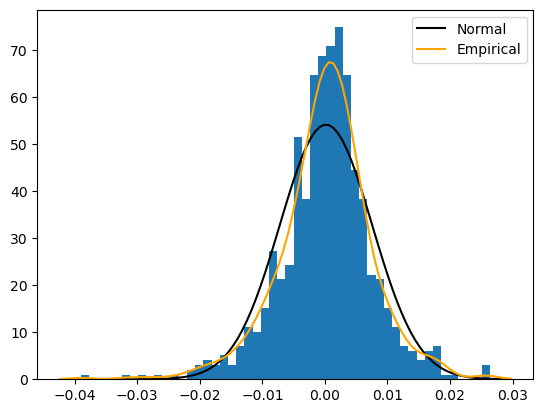

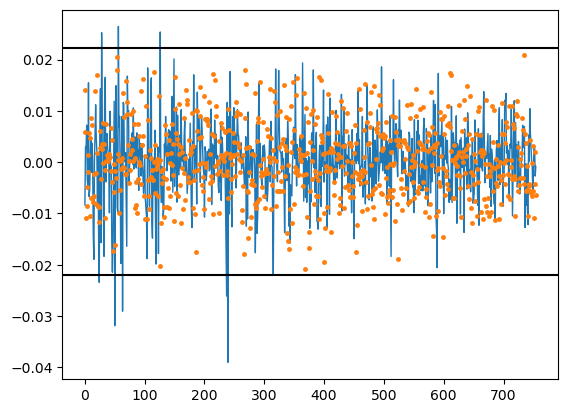

[*********************100%***********************]  1 of 1 completed


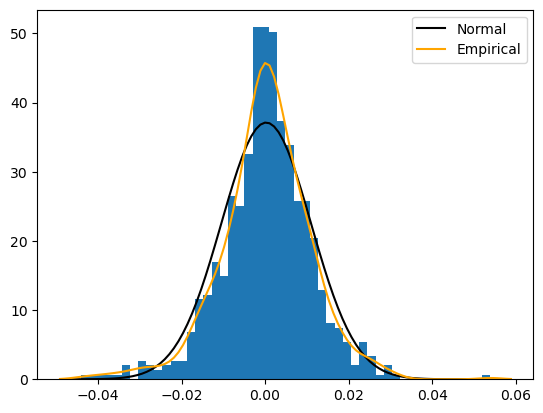

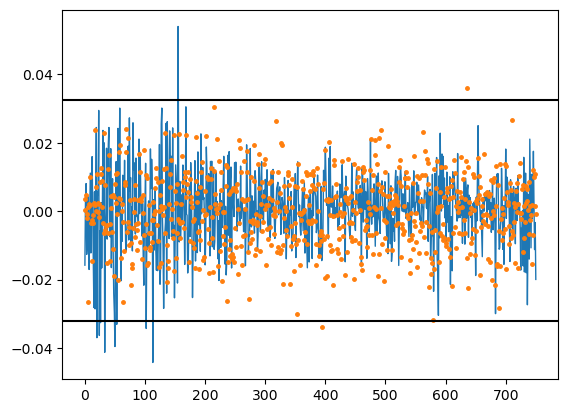

In [150]:
#Import data
data = yf.download("^FTSE", start="2022-03-30", end="2025-03-30", auto_adjust=True)
close = data["Close"].to_numpy()
logreturns = np.log(close[1:]/close[:-1])
mean = np.mean(logreturns); sd = np.sqrt(np.var(logreturns))

#Histogram with normal and emperical distribution 
plt.hist(logreturns, density = True, bins = 50)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
kde = stats.gaussian_kde(logreturns.T)
kde_vals = kde(x)
norm = stats.norm.pdf(x, mean, sd)
plt.plot(x, norm, label = "Normal", color = "black")
plt.plot(x, kde_vals, color = "orange", label = "Empirical")
plt.legend(loc = "upper right")
plt.savefig("FTSE hist")
plt.show()

#Log returns and theoretical random normal values
plt.plot(logreturns, linewidth = 1)
nrm = np.random.normal(loc = mean, scale = sd, size = len(logreturns))
plt.plot(nrm, ".", markersize = 5)
plt.axhline(y = mean + 3*sd, color = "black")
plt.axhline(y = mean - 3*sd, color = "black")
plt.savefig("FTSE vs sample")
plt.show()

data = yf.download("^GSPC", start="2022-03-30", end="2025-03-30", auto_adjust=True)
close = data["Close"].to_numpy()
logreturns = np.log(close[1:]/close[:-1])
mean = np.mean(logreturns); sd = np.sqrt(np.var(logreturns))

#Histogram with normal and emperical distribution
plt.hist(logreturns, density = True, bins = 50)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
kde = stats.gaussian_kde(logreturns.T)
kde_vals = kde(x)
norm = stats.norm.pdf(x, mean, sd)
plt.plot(x, norm, label = "Normal", color = "black")
plt.plot(x, kde_vals, color = "orange", label = "Empirical")
plt.legend(loc = "upper right")
plt.savefig("SP500 hist")
plt.show()

#Log returns and theoretical random normal values
plt.plot(logreturns, linewidth = 1)
nrm = np.random.normal(loc = mean, scale = sd, size = len(logreturns))
plt.plot(nrm, ".", markersize = 5)
plt.axhline(y = mean + 3*sd, color = "black")
plt.axhline(y = mean - 3*sd, color = "black")
plt.savefig("SP500 vs sample")
plt.show()

Poisson Trajectory

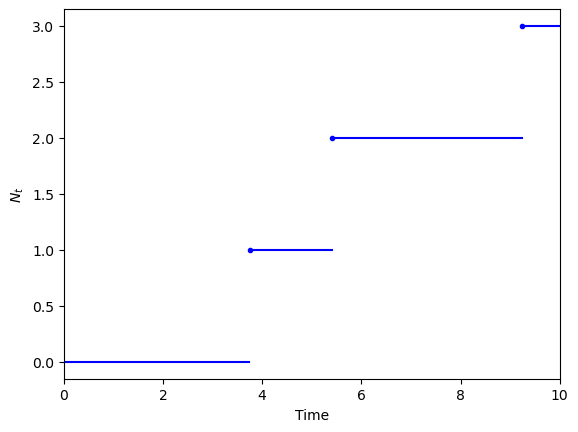

In [17]:
#Define parameters
s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Nt = np.array([])
t = np.linspace(0, T, n+1)
#Generate jump times
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
#Convert to indexed values
jumps = np.ceil(Tn[:-1]/dt).astype(int)
#Adjust to add start and end points
jumps2 = np.insert(jumps, 0, 0)
jumps2 = np.append(jumps2, n+1)
#Generate the value of the Poisson process
for i in range(len(jumps2)-1):
    Nt = np.append(Nt, np.repeat(i, jumps2[i+1] - jumps2[i]))
#Plot the process as continuous between the discontinuities
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i], jumps2[i+1])
    plt.plot(t[x], Nt[x], color = "b")  
#Plot the jump points
plt.plot(t[jumps], Nt[jumps], ".", color = "b")
plt.xlim(0, T); plt.xlabel("Time"); plt.ylabel("$N_t$")
plt.savefig("Poisson")

Comensated Poisson Trajectory

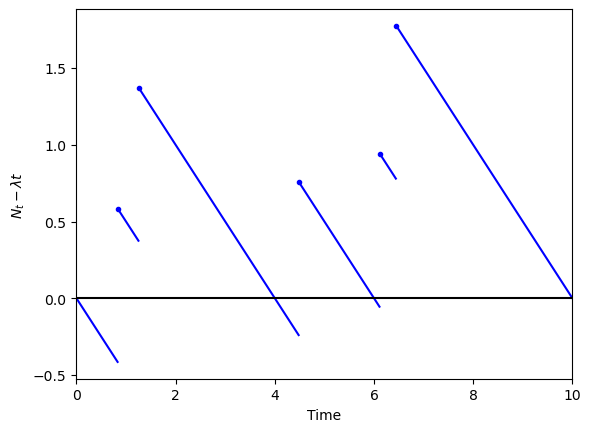

In [12]:
#Define parameters
s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Nt = np.array([])
t = np.linspace(0, T, n+1)
#Generate jump times
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
#Convert to indexed values
jumps = np.ceil(Tn[:-1]/dt).astype(int)
#Adjust to add start and end points
jumps2 = np.insert(jumps, 0, 0)
jumps2 = np.append(jumps2, n+1)
#Generate the value of the Poisson process and then compensate it 
for i in range(len(jumps2)-1):
    Nt = np.append(Nt, np.repeat(i, jumps2[i+1] - jumps2[i]))
Nt = Nt - rate*t
#Plot the continuous sections between the jumps
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i], jumps2[i+1])
    plt.plot(t[x], Nt[x], color = "b")  
#Plot the jump points
plt.plot(t[jumps], Nt[jumps], ".", color = "b")
plt.axline((0, 0), slope = 0, c = 'black')
plt.xlim(0, T); plt.xlabel("Time"); plt.ylabel("$N_t - \lambda t$")
plt.savefig("Compensated Poisson")

Compound Poisson Trajectory Jump Size Distribution

Exponential

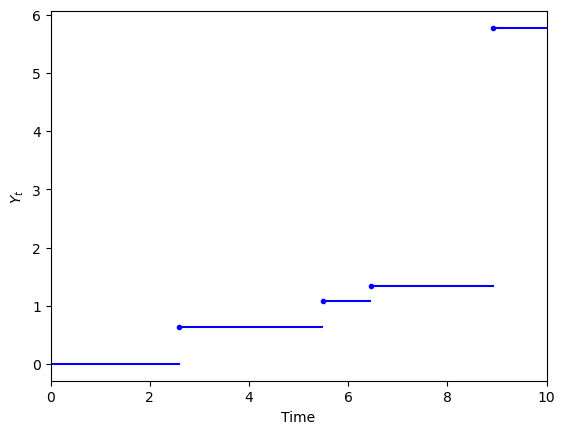

In [33]:
#Define parameters
s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Yt = np.array([])
t = np.linspace(0, T, n+1)
#Generate jump times
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
#Convert to indexed values
jumps = np.ceil(Tn[:-1]/dt).astype(int)
#Adjust to add start and end points
jumps2 = np.insert(jumps, 0, 0)
jumps2 = np.append(jumps2, n+1)
#Generate jump sizes
jumpsize = stats.expon.rvs(scale = 1/rate, size = len(jumps))
vals = np.cumsum(jumpsize)
vals = np.insert(vals, 0, 0)
#Generate the value of the compound Poisson process
for i in range(len(jumps2)-1):
    Yt = np.append(Yt, np.repeat(vals[i], jumps2[i+1] - jumps2[i]))
#Plot the process as continuous between the discontinuities
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i], jumps2[i+1])
    plt.plot(t[x], Yt[x], color = "b")  
#Plot the jump points
plt.plot(t[jumps], Yt[jumps], ".", color = "b")
plt.xlim(0, T); plt.xlabel("Time"); plt.ylabel("$Y_t$")
plt.savefig("Compound Poisson Exp")

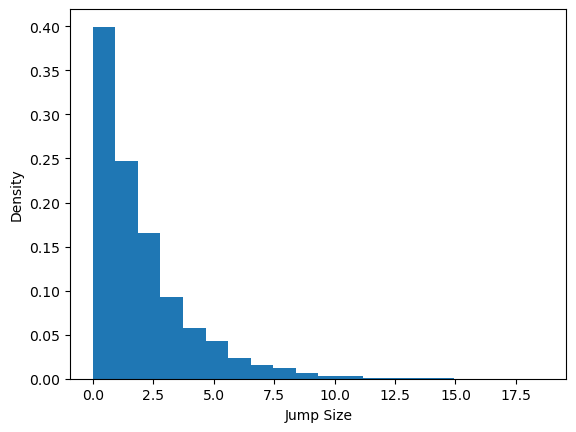

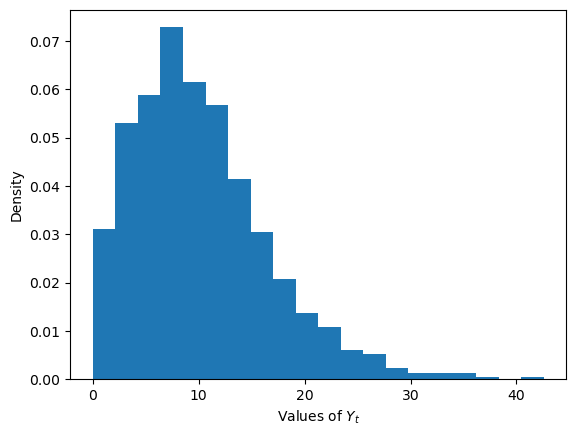

In [34]:
#1000 sample trajectories
M = 1000; totjumps =  np.array([]); Vals = np.array([])
for j in range(M):
    #Define parameters
    s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Yt = np.array([])
    t = np.linspace(0, T, n+1)
    #Generate jump times
    while s <= T-dt:
        s = s + stats.expon.rvs(scale = 1/rate)
        Tn = np.append(Tn, s)
    #Convert to indexed values
    jumps = np.ceil(Tn[:-1]/dt).astype(int)
    #Adjust to add start and end points
    jumps2 = np.insert(jumps, 0, 0)
    jumps2 = np.append(jumps2, n+1)
    #Generate jump sizes
    jumpsize = stats.expon.rvs(scale = 1/rate, size = len(jumps))
    vals = np.cumsum(jumpsize)
    vals = np.insert(vals, 0, 0)
    #Generate the value of the compound Poisson process
    for i in range(len(jumps2)-1):
        Yt = np.append(Yt, np.repeat(vals[i], jumps2[i+1] - jumps2[i]))
    #Arrays of all jumps and all finishing values of Yt
    totjumps = np.append(totjumps, jumpsize)
    Vals = np.append(Vals, Yt[n])
plt.hist(totjumps, bins = 20, density = True)
plt.xlabel("Jump Size"); plt.ylabel("Density")
plt.savefig("Exp Dist Jump Size")
plt.show()
plt.hist(Vals, bins = 20, density = True)
plt.xlabel("Values of $Y_t$"); plt.ylabel("Density")
plt.savefig("Exp Dist Values")
plt.show()

Normal

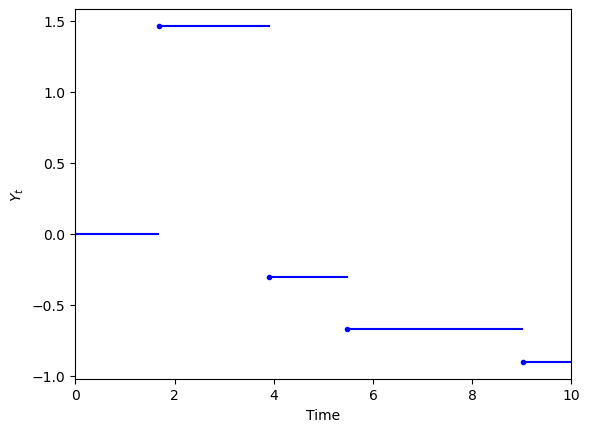

In [53]:
#Define parameters
s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Yt = np.array([])
t = np.linspace(0, T, n+1)
#Generate jump times
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
#Convert to indexed values
jumps = np.ceil(Tn[:-1]/dt).astype(int)
#Adjust to add start and end points
jumps2 = np.insert(jumps, 0, 0)
jumps2 = np.append(jumps2, n+1)
#Generate jump sizes
jumpsize = stats.norm.rvs(size = len(jumps))
vals = np.cumsum(jumpsize)
vals = np.insert(vals, 0, 0)
#Generate the value of the compound Poisson process
for i in range(len(jumps2)-1):
    Yt = np.append(Yt, np.repeat(vals[i], jumps2[i+1] - jumps2[i]))
#Plot the process as continuous between the discontinuities
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i], jumps2[i+1])
    plt.plot(t[x], Yt[x], color = "b")  
#Plot the jump points
plt.plot(t[jumps], Yt[jumps], ".", color = "b")
plt.xlim(0, T); plt.xlabel("Time"); plt.ylabel("$Y_t$")
plt.savefig("Compound Poisson Normal")

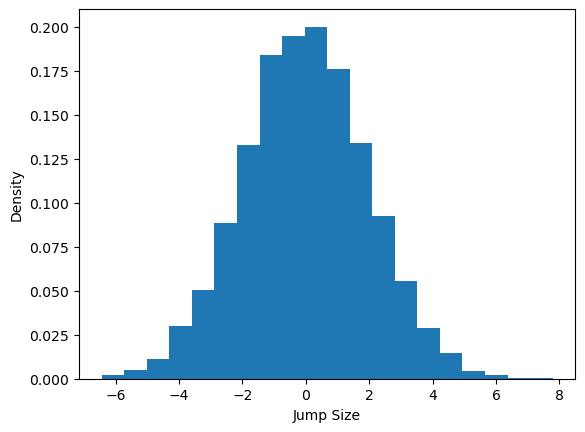

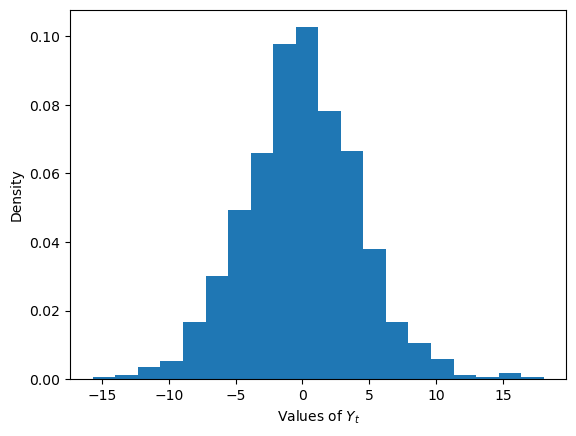

In [54]:
#1000 sample trajectories
M = 1000; totjumps =  np.array([]); Vals = np.array([])
for j in range(M):
    #Define parameters
    s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Yt = np.array([])
    t = np.linspace(0, T, n+1)
    #Generate jump times
    while s <= T-dt:
        s = s + stats.expon.rvs(scale = 1/rate)
        Tn = np.append(Tn, s)
    #Convert to indexed values
    jumps = np.ceil(Tn[:-1]/dt).astype(int)
    #Adjust to add start and end points
    jumps2 = np.insert(jumps, 0, 0)
    jumps2 = np.append(jumps2, n+1)
    #Generate jump sizes
    jumpsize = stats.norm.rvs(scale = 1/rate, size = len(jumps))
    vals = np.cumsum(jumpsize)
    vals = np.insert(vals, 0, 0)
    #Generate the value of the compound Poisson process
    for i in range(len(jumps2)-1):
        Yt = np.append(Yt, np.repeat(vals[i], jumps2[i+1] - jumps2[i]))
    #Arrays of all jumps and all finishing values of Yt
    totjumps = np.append(totjumps, jumpsize)
    Vals = np.append(Vals, Yt[n]) 
plt.hist(totjumps, bins = 20, density = True)
plt.xlabel("Jump Size"); plt.ylabel("Density")
plt.savefig("Norm Dist Jump Size")
plt.show()
plt.hist(Vals, bins = 20, density = True)
plt.xlabel("Values of $Y_t$"); plt.ylabel("Density")
plt.savefig("Norm Dist Values")
plt.show()

Compensated Compound Poisson Exponential Jumps

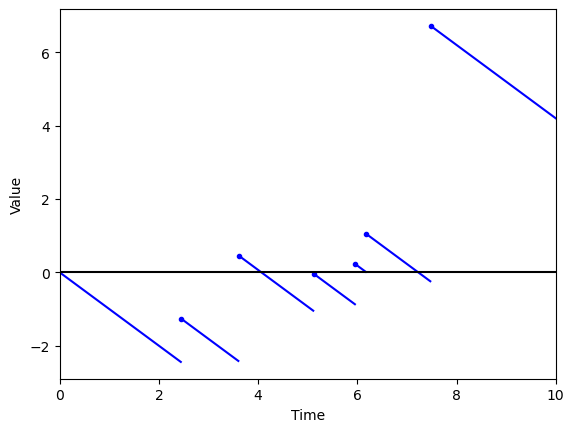

In [95]:
s = 0; Tn = ([]); T = 10; n = 1000; dt = T/n; rate = 0.5; Yt = np.array([]); lam = 1/2
t = np.linspace(0, T, n+1)
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
jumps = np.ceil(Tn[:-1]/dt).astype(int)
jumps2 = np.insert(jumps, 0, 0)
jumps2 = np.append(jumps2, 1001)
#Generate jump sizes
jumpsize = stats.expon.rvs(scale = 1/lam, size = len(jumps))
vals = np.cumsum(jumpsize)
vals = np.insert(vals, 0, 0)
#Generate compound Poisson process and then compensate it
for i in range(len(jumps2)-1):
    Yt = np.append(Yt, np.repeat(vals[i], jumps2[i+1] - jumps2[i]))
Yt = Yt - 1/lam*rate*t   
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i], jumps2[i+1])
    plt.plot(t[x], Yt[x], color = "b")  
plt.plot(t[jumps], Yt[jumps], ".", color = "b")
plt.axline((0, 0), slope = 0, c = 'black')
plt.xlim(0, T); plt.xlabel("Time"); plt.ylabel("Value")
plt.savefig("Compensated Compound Poisson")

Comparing Asset Price Trajectories

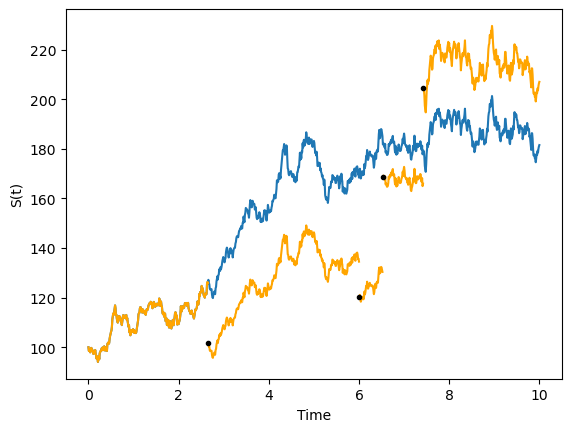

In [62]:
mu = 0.04; sig = 0.1; S0 = 100; N = 1000; T = 10; t = np.linspace(0, T, N+1)
dt = T/N
#Trajectory without jumps
S = S0*np.ones(N)
W = np.random.normal(0, np.sqrt(dt), N) 
dS = np.exp((mu - (sig**2)/2)*dt + sig*W)
S = S*np.cumprod(dS)
S = np.insert(S, 0, S0)
plt.plot(t, S)
#Generate the effect of the jumps
s = 0; rate = 0.5; Tn = ([]); n = 0; dZ = np.zeros(1000)
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/rate)
    Tn = np.append(Tn, s)
Zk = np.random.normal(0, 0.25, max(len(Tn)-1, 0))
jumps = np.ceil(Tn[:-1]/dt).astype(int)
dZ[jumps] = Zk
dZ = np.insert(dZ, 0, 0)
#Multiply trajectory without jumps by jump effect
S2 = S*np.cumprod(1+dZ)
jumps2 = np.insert(jumps, 0, -1)
jumps2 = np.append(jumps2, N)
for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i]+1, jumps2[i+1]+1) 
    plt.plot(t[x], S2[x], c = "orange")
plt.plot(t[jumps+1], S2[jumps+1], ".", c = "black")
plt.xlabel("Time"); plt.ylabel("S(t)")
plt.savefig("Asset Price Trajectory")

Poisson COV

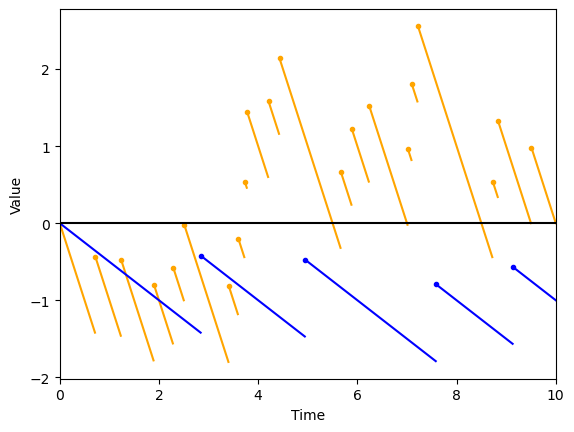

In [122]:
lam = 0.5; lam2 = 2; c = -1 + lam2/lam; n = 20; N = 1000; T = 10; dt = T/N; t = np.linspace(0, T, N+1)
s = 0; Tn = ([])
#Generate Poisson process under measure P_lam2
while s <= T-dt:
    s = s + stats.expon.rvs(scale = 1/lam2)
    Tn = np.append(Tn, s)
def Stepfun(t, Tn):
    count = 0
    for i in range(len(Tn)):
        if t >= Tn[i]:
            count = count + 1
    return count
y = np.zeros(len(t))
y2 = np.zeros(len(t))
#Martingales of both normal compensated Poisson and compensated Poisson with change of measure by time dialation
for i in range(len(t)):
    y[i] = Stepfun(t[i]/(1+c), Tn) - lam*t[i]
    y2[i] = Stepfun(t[i], Tn) - lam2*t[i]
jumps = np.ceil(Tn[:-1]/dt).astype(int)
jumps3 = np.ceil(Tn[:-1]/dt*(1+c)).astype(int)
jumps3 = jumps3[jumps3 <= N-1]
jumps2 = np.insert(jumps, 0, 0)
jumps2 = np.append(jumps2, N+1)
jumps4= np.insert(jumps3, 0, 0)
jumps4 = np.append(jumps4, N+1)

for i in range(len(jumps2)-1):
    x = np.arange(jumps2[i], jumps2[i+1]) 
    plt.plot(t[x], y2[x], c = "orange")
for j in range(len(jumps4)-1):
    x2 = np.arange(jumps4[j], jumps4[j+1]) 
    plt.plot(t[x2], y[x2], c = "blue")
plt.plot(t[jumps3], y[jumps3], ".", c = "blue")
plt.plot(t[jumps], y2[jumps], ".",  c = "orange")
plt.axline((0, 0), slope = 0, c = 'black')
plt.xlabel("Time"); plt.ylabel("Value")
plt.xlim(0, T)
plt.savefig("Poisson Change of Variables")

Monte-Carlo Graph

In [138]:
def BScall(S, E, r, sig, T):
    d1 = (np.log(S/E) + (r + sig**2/2)*T)/(sig*np.sqrt(T))
    d2 = d2 = d1 - sig*np.sqrt(T)
    return S*stats.norm.cdf(d1) - E*np.exp(-r*T)*stats.norm.cdf(d2)

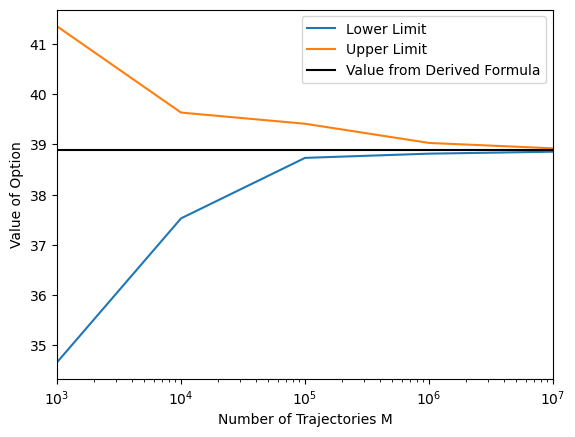

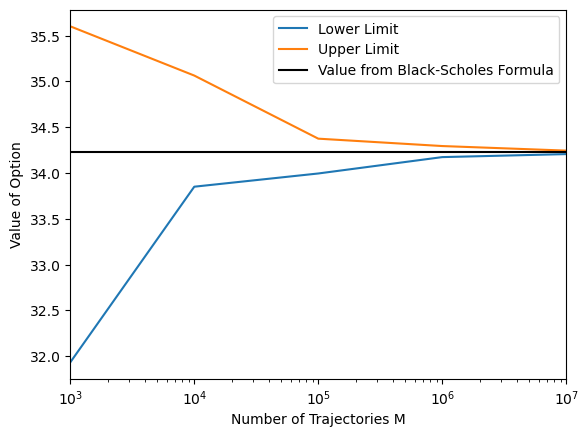

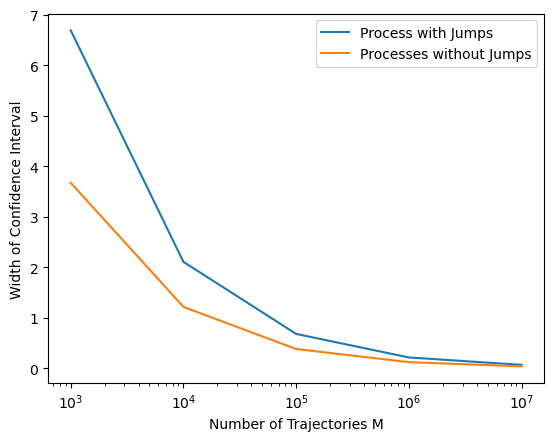

In [153]:
#Define parameters
S0 = 100; K = 100; T = 10; r = 0.04; sig = 0.1; rate = 2; delta = 0; eta = 0.1; mu = r - sig**2/2 - rate*(np.exp(delta+eta**2/2)-1)
#Monte-Carlo estimate under a range of values of M
M = [1000, 10000, 100000, 1000000, 10000000]
confint = np.zeros((len(M),2))
confint2 = np.zeros((len(M),2))
for i in range(len(M)):
    #First process with jumps
    S = np.zeros(M[i])
    Nt = np.random.poisson(lam = rate*T, size = M[i])
    W = np.random.normal(0, np.sqrt(T), size = M[i])
    S = S0*np.exp(mu*T+sig*W+np.random.normal(Nt*delta, np.sqrt(Nt)*eta))
    Payoff = np.exp(-r*T)*np.maximum(S - K,0)
    aMcall=np.mean(Payoff);
    bMcall=np.std(Payoff);
    confint[i,:] = [aMcall-1.96*bMcall/np.sqrt(M[i]),aMcall+1.96*bMcall/np.sqrt(M[i])]
    
    #Process with jumps, using same Brownian motion values, with a change in drift as no jumps
    S2 = np.zeros(M[i])
    S2 = S0*np.exp((r-sig**2/2)*T+sig*W)
    Payoff2 = np.exp(-r*T)*np.maximum(S2 - K,0)
    aMcall2=np.mean(Payoff2);
    bMcall2=np.std(Payoff2);
    confint2[i,:] = [aMcall2-1.96*bMcall2/np.sqrt(M[i]),aMcall2+1.96*bMcall2/np.sqrt(M[i])]

#Value of Process with jumps via formula
price = 0
for n in range(100):
    price = price + (T*rate)**n/math.factorial(n)*BScall(S0*np.exp(n*delta+n*eta**2/2 - rate*(np.exp(delta+eta**2/2)-1)*T), K, r, np.sqrt(sig**2 + n*eta**2/T), T)
BSprice = np.exp(-rate*T)*price
#BS formula 
BSprice2 = BScall(S0, K, r, sig, T)

plt.plot(M, confint, label = ["Lower Limit", "Upper Limit"])
plt.xscale("log")
plt.xlabel("Number of Trajectories M")
plt.ylabel("Value of Option")
plt.axhline(y = BSprice, color = "black", label = "Value from Derived Formula")
plt.xlim(M[0], M[len(M)-1])
plt.legend()
plt.savefig("Convergence_Jump")
plt.show()

plt.plot(M, confint2, label = ["Lower Limit", "Upper Limit"])
plt.xscale("log")
plt.xlabel("Number of Trajectories M")
plt.ylabel("Value of Option")
plt.axhline(y = BSprice2, color = "black", label = "Value from Black-Scholes Formula")
plt.xlim(M[0], M[len(M)-1])
plt.legend()
plt.savefig("Convergence_BS")
plt.show()

a = confint[:,1] - confint[:,0]
b = confint2[:,1] - confint2[:,0]
plt.plot(M, a, label = "Process with Jumps")
plt.plot(M, b, label = "Processes without Jumps")
plt.xscale("log")
plt.legend(loc = 'upper right')
plt.xlabel("Number of Trajectories M")
plt.ylabel("Width of Confidence Interval")
plt.savefig("CI_Width")
plt.show()

In [143]:
#Computation time for process with jumps with 10 million trajectories
start = time.time()
S0 = 100; K = 100; T = 10; r = 0.04; sig = 0.1; rate = 2; delta = 0; eta = 0.1; mu = r - sig**2/2 - rate*(np.exp(delta+eta**2/2)-1)
M = 10000000
confint = np.zeros(2)
vCall = 0
S = np.zeros(M)
#Number of jumps for each trajectory
Nt = rng.poisson(lam = rate*T, size = M)
#Have combined the effect of each jump and the Browninan motion into one random variable
S = S0*np.exp(mu*T+rng.normal(Nt*delta, np.sqrt((np.sqrt(T)*sig)**2 + (np.sqrt(Nt)*eta)**2)))
Payoff = np.exp(-r*T)*np.maximum(S - K,0)
aMcall=np.mean(Payoff);
bMcall=np.std(Payoff);
confint = [aMcall-1.96*bMcall/np.sqrt(M),aMcall+1.96*bMcall/np.sqrt(M)]
vCall = aMcall
end = time.time()

price = 0
for n in range(100):
    price = price + (T*rate)**n/math.factorial(n)*BScall(S0*np.exp(n*delta+n*eta**2/2 - rate*(np.exp(delta+eta**2/2)-1)*T), K, r, np.sqrt(sig**2 + n*eta**2/T), T)
BSprice = np.exp(-rate*T)*price
confint, BSprice

print(end-start)
confint, BSprice, confint[1]-confint[0], (bMcall*2*1.96/0.01)**2

2.870633363723755


([38.84934655918638, 38.916772808522346],
 38.896633145089716,
 0.0674262493359663,
 454629909.95154035)

In [144]:
#Computation time for process without jumps with 10 million trajectories
start = time.time()
S0 = 100; K = 100; T = 10; r = 0.04; sig = 0.1; rate = 2; delta = 0; eta = 0.1; mu = r - sig**2/2
M = 10000000
confint = np.zeros(2)
vCall = 0
S = np.zeros(M)
S = S0*np.exp(mu*T+rng.normal(0, sig*np.sqrt(T), size = M))
Payoff = np.exp(-r*T)*np.maximum(S - K,0)
aMcall=np.mean(Payoff);
bMcall=np.std(Payoff);
confint = [aMcall-1.96*bMcall/np.sqrt(M),aMcall+1.96*bMcall/np.sqrt(M)]
vCall = aMcall
end = time.time()
BSprice = BScall(S0, K, r, sig, T)
print(end-start)
confint, BSprice, confint[1]-confint[0], (bMcall*2*1.96/0.01)**2

0.8118703365325928


([34.204309539169685, 34.24248075050073],
 34.2266284602673,
 0.03817121133104706,
 145704137.4479892)

460 million trajectories, process with jumps

In [147]:
start = time.time()
S0 = 100; K = 100; T = 10; r = 0.04; sig = 0.1; rate = 2; delta = 0; eta = 0.1; mu = r - sig**2/2 - rate*(np.exp(delta+eta**2/2)-1)
M = 460000000
confint = np.zeros(2)
S = np.zeros(M)
Nt = rng.poisson(lam = rate*T, size = M)
S = S0*np.exp(mu*T+rng.normal(Nt*delta, np.sqrt((np.sqrt(T)*sig)**2 + (np.sqrt(Nt)*eta)**2)))
Payoff = np.exp(-r*T)*np.maximum(S - K,0)
aMcall=np.mean(Payoff);
bMcall=np.std(Payoff);
confint = [aMcall-1.96*bMcall/np.sqrt(M),aMcall+1.96*bMcall/np.sqrt(M)]
end = time.time()
print(end-start)
price = 0
for n in range(100):
    price = price + (T*rate)**n/math.factorial(n)*BScall(S0*np.exp(n*delta+n*eta**2/2 - rate*(np.exp(delta+eta**2/2)-1)*T), K, r, np.sqrt(sig**2 + n*eta**2/T), T)
BSprice = np.exp(-rate*T)*price
confint, BSprice, confint[1] - confint[0]

149.09418869018555


([38.88999772204475, 38.89994676120079],
 38.896633145089716,
 0.00994903915604084)

150 million trajectories, process without jumps

In [148]:
start = time.time()
S0 = 100; K = 100; T = 10; r = 0.04; sig = 0.1; rate = 2; delta = 0; eta = 0.1; mu = r - sig**2/2
M = 150000000
confint = np.zeros(2)
S = np.zeros(M)
S = S0*np.exp(mu*T+rng.normal(0, sig*np.sqrt(T), size = M))
Payoff = np.exp(-r*T)*np.maximum(S - K,0)
aMcall=np.mean(Payoff);
bMcall=np.std(Payoff);
confint = [aMcall-1.96*bMcall/np.sqrt(M),aMcall+1.96*bMcall/np.sqrt(M)]
end = time.time()
print(end-start)
BSprice = BScall(S0, K, r, sig, T)
confint, BSprice, confint[1] - confint[0]

12.786938428878784


([34.222173786805854, 34.23202932990628],
 34.2266284602673,
 0.009855543100428577)